In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow numpy matplotlib pillow

In [ ]:
import os
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

In [ ]:
data_path = '/content/drive/MyDrive/UCMerced_LandUse/UCMerced_LandUse/Images_converted'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1680 images belonging to 21 classes.
Found 420 images belonging to 21 classes.


In [ ]:
base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling to reduce dimensions
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 30s 526ms/step - accuracy: 0.9150 - loss: 0.2555 - val_accuracy: 0.7788 - val_loss: 0.6838
Epoch 2/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9375 - loss: 0.2078 - val_accuracy: 0.7500 - val_loss: 0.4433
Epoch 3/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 463ms/step - accuracy: 0.9227 - loss: 0.2631 - val_accuracy: 0.7644 - val_loss: 0.7161
Epoch 4/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.3997 - val_accuracy: 0.5000 - val_loss: 1.6721
Epoch 5/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 465ms/step - accuracy: 0.9397 - loss: 0.1833 - val_accuracy: 0.7764 - val_loss: 0.7328
Epoch 6/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9375 - loss: 0.1849 - val_accuracy: 1.0000 - val_loss: 0.1848
Epoch 7/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 472ms/step - accuracy: 0.9238 - loss: 0.2235 - val_accuracy: 0.7644 - val_loss: 0.6796
Epoch 8/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 1.0000 - loss: 0.0315 - val_accuracy: 1.0

In [ ]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")


Final Training Accuracy: 0.9363
Final Validation Accuracy: 0.8077


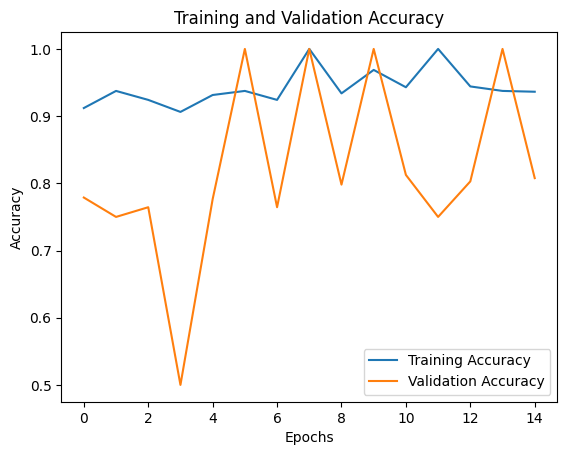

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


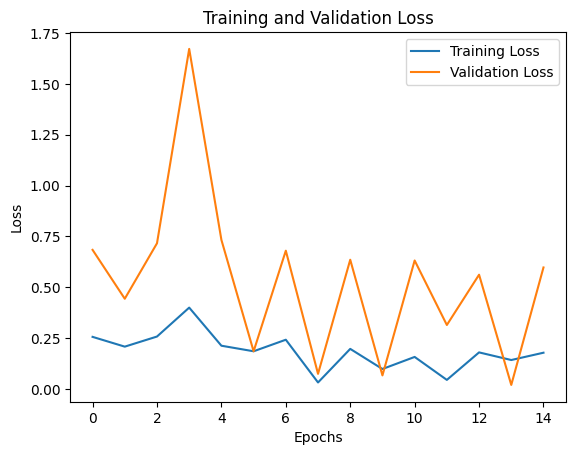

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_labels))


14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step
                   precision    recall  f1-score   support

     agricultural       0.06      0.05      0.05        20
         airplane       0.11      0.10      0.11        20
  baseballdiamond       0.18      0.10      0.13        20
            beach       0.10      0.10      0.10        20
        buildings       0.00      0.00      0.00        20
        chaparral       0.15      0.15      0.15        20
 denseresidential       0.08      0.05      0.06        20
           forest       0.05      0.05      0.05        20
          freeway       0.09      0.10      0.10        20
       golfcourse       0.06      0.10      0.08        20
           harbor       0.10      0.10      0.10        20
     intersection       0.07      0.05      0.06        20
mediumresidential       0.07      0.05      0.06        20
   mobilehomepark       0.12      0.15      0.13        20
         overpass       0.07      0.05      0.06        20
       parkinglo

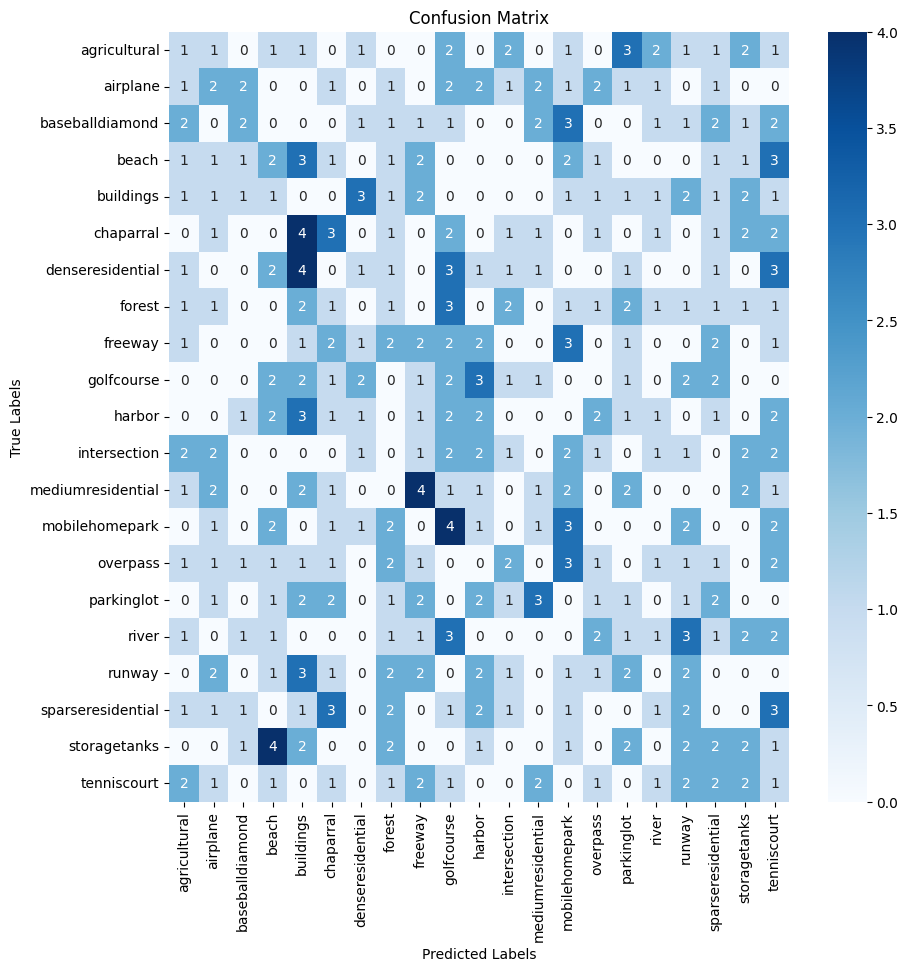

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
